# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
from fastai import *
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


내 구글드라이브에 마운트했다.

**중간중간 '''로 묶은 코드들이 있을텐데, 시간을 절약하기 위해서 폴더 만들기, 이미지 다운로드 같이 필요 없는 코드들을 스킵하기 위해 묶어놨다.**

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [0]:
folder = 'black'
file = 'urls_black.txt'

In [0]:
folder = 'teddies'
file = 'urls_teddies.txt'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

위 세 개는 내가 폴더를 만들고, 이미지를 다운받는데 좀더 편하게 하기 위해 쓰인다. 왔다갔다 할 것이다.

You will need to run this cell once per each category.

In [6]:
'''path = Path(base_dir + 'data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)'''

"path = Path(base_dir + 'data/bears')\ndest = path/folder\ndest.mkdir(parents=True, exist_ok=True)"

folder=black을 실행후 위 코드를 실행하였으며, 내 구글드라이브에 디렉토리 /content/gdrive/My Drive/fastai-v3/data/bears/black이 생겼다. 위에서 teddies나 grizzly를 실행후 이 코드를 다시 실행하면서 teddies와 grizzly 폴더도 만들었다.
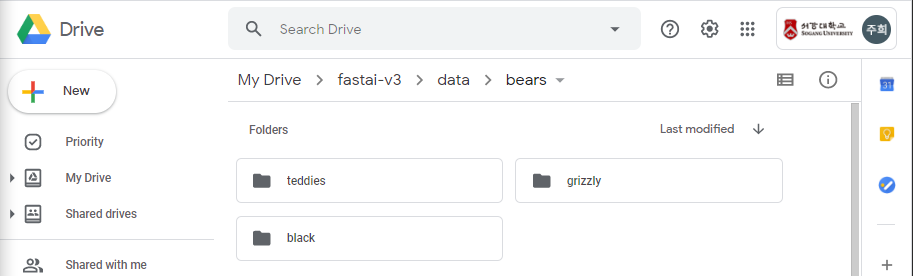


In [7]:
path = Path(base_dir + 'data/bears')
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/black'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/teddies'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/urls_teddies.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/urls_grizzly.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/urls_black.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/grizzly'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/cleaned.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/export.pkl')]

일단 폴더 안에 이런 애들이 있다. 지금 내가 밑의 코드들을 이미 다 실행해 본 상태에서 코드를 처음부터 끝까지 다시 돌리는 것이기 때문에 몇몇 폴더 및 파일이 추가로 생성된 상태다. 다만 txt파일은 이미지주소모음 txt파일인데 내가 직접 넣어준 것이다.

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://github.com/fastai/course-v3/blob/master/nbs/dl1/images/download_images/upload.png?raw=1)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['teddies','grizzly','black']

우리의 라벨들이다.

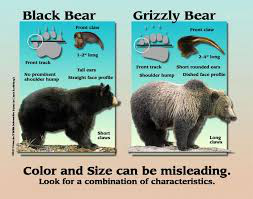

In [9]:
'''path = Path(base_dir + 'data/bears')
dest = path/folder
download_images(path/file, dest, max_pics=200)'''
img = open_image(path/'black'/'00000199.jpg')
img

앞쪽 코드들을 번갈아 실행하면서 folder변수와 file변수 값을 바꿔준다. 그러면 bears폴더에 있는, 내가 구글 이미지로부터 받은 이미지주소가 담긴 텍스트파일을 읽고 이미지들을 다운받는다.

++원본 노트북에는 위의 두줄이 없었다. 나는 그것도 모르고 위에 있는 folder변수와 file변수만 바꿔주는 셀들을 실행하고 왜 자꾸 grizzly에 다운되나 했다. 그래서 path랑 dest를 바꿔주는 두 줄을 추가한 후에는 제대로 이미지를 각 폴더에 다운받을 수 있었다. 걱정되는 점은 어떤 이미지들이 다운받아져있나 슬쩍 봤는데, 구글에서 일괄적으로 받아서 그런지 가끔 말도 안되는 사진들이 들어가있기도 했다.

예시로 위에서 내가 띄운 이미지는 black에 담긴 사진인데, 그리즐리랑 서로 비교하는 사진이다... 이건 블랙인지 그리즐리인지...  요런 사진들이 더 있으니 나중에 문제가 될 것이다.

Then we can remove any images that can't be opened:

In [10]:
'''for c in classes:
      print(c)
      verify_images(path/c, delete=True, max_size=500)'''

'for c in classes:\n      print(c)\n      verify_images(path/c, delete=True, max_size=500)'

위 코드는 폴더에 있는 파일중에 사실은 이미지가 아닌 애들을 지워준다. 우리가 필요한건 이미지파일 뿐이니 쓸모 없는 애들을 지워주도록 했다.

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

여기서부턴 아주 익숙한 ImageDataBunch이다. 저번시간에는 정규표현식으로 label을 붙여줬다. 하지만 이번에는 from_folder를 써서 폴더명으로 label을 붙여줄 것이다.
ImageNet의 데이터셋을 이용해서 normalize도 완료했다.

Good! Let's take a look at some of our pictures then.

In [12]:
data.classes

['black', 'grizzly', 'teddies']

이러한 종류로 학습될 것이다. 역시나, 폴더명으로 만들어졌다.

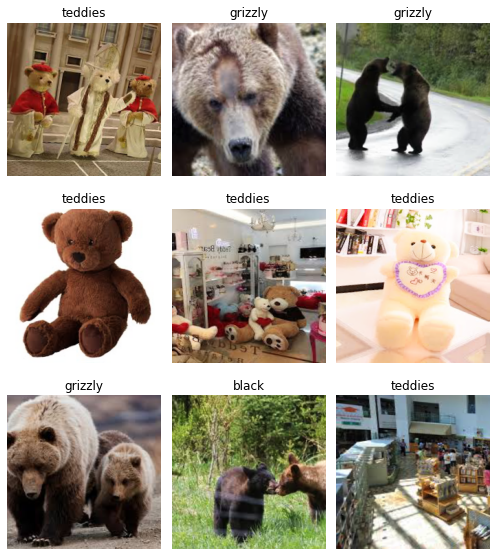

In [13]:
data.show_batch(rows=3, figsize=(7,8))

show_batch로 어떤 사진들이 있는지 뽑아 3X3으로 확인해보았다. 아까 구글 드라이브에서 직접 확인해보았듯이, 사진 중 몇 개는 좀 구분하기 어려워보인다. 특히 3행3열은 전혀 teddies로 생각되지 않는다.

In [14]:
print(data.classes)
print(data.c)
print(len(data.train_ds))
print(len(data.valid_ds))

['black', 'grizzly', 'teddies']
3
480
120


다시 체크해본다. data.classes로 확인한 결과, label은 위의 세개가 있다.
data.c로 가능한 label의 경우는 3개라는 것을 알 수 있다.
그리고 training set에는 480개, validation set에는 120개의 데이터가 있다.

## Train model

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


역시 지난 시간과 같다.
우리의 데이터에 적용할 ResNet34가 미리 학습해놓은 model을 가져와서 learn에 선언해준다.

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.028525,0.752580,0.241667,00:57
1,0.578027,0.325981,0.066667,00:11
2,0.428816,0.165851,0.033333,00:05
3,0.349611,0.153294,0.025000,00:04


4번 시켜서 에러율은 4.1퍼센트이다. 정말 기쁜점은 지난 시간의 pet 구분하는 것 만큼 오래걸리지 않았다는것이다...

In [0]:
learn.save('stage-1')

혹시나 나중에 지금 계산된 값들을 나중에 쓸 수 있으므로 시간을 아끼기 위해 지금의 값들을 저장해놓는다.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


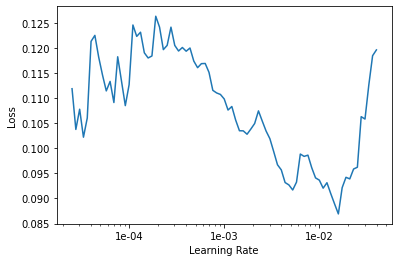

In [18]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

learning rate에 따라 loss가 얼마나 발생하는지 확인해준다. 그리고 그것을 그래프로 보여주었다. 강의자분이 디폴트로 준 것 과 달리 나는 시작 learning rate를 1e-05로 했기 때문에 그래프가 약간 다르게 생겼지만, 여기서 적절한 learning rate를 알게 되었다. 1e-4부터 1e-3을 나의 learning rate로 할 것이다. (learning rate가 너무 낮아도 안좋다)

In [19]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.134380,0.157054,0.050000,00:05
1,0.161242,0.346980,0.066667,00:05
2,0.180539,0.242552,0.066667,00:05
3,0.162303,0.193043,0.066667,00:05


unfreeze하고 learning rate를 바꾼 다음에 사이클을 돌렸다. 결과가 그닥 좋진 않다. **내생각에 이건 코드의 문제가 아니라 지금 내가 쓰고 있는 데이터셋이 문제같다. 구글에서 임의로 받은 사진들이므로 예측불가한 이상한 사진들이 들어가 있어서 결과가 이상해질거 같긴 하다.**

In [20]:
'''learn.load('stage-1')'''

"learn.load('stage-1')"

이 부분은 앞에서 결과가 별로 안좋을까봐 내가 임의로 넣었다.

In [0]:
learn.save('stage-2')

이제 이 결과를 저장하고 나중에 쓸 것이다.

## Interpretation

In [0]:
learn.load('stage-2');

저장한 결과를 불러와서

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

이제 결과를 분석하겠다.

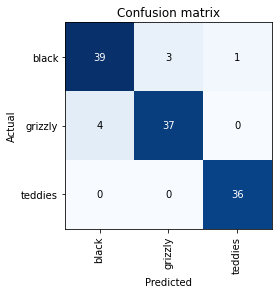

In [24]:
interp.plot_confusion_matrix()

8개의 틀린 케이스가 있었다.

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *

이번에는 분류에 실패했던 사진들을 삭제해서 우리 데이터셋에 이상한 사진이 없도록 할 것이다(아까 그리즐리와 블랙 베어를 비교한 사진처럼).

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

이 과정은 실제 사진들을 내 구글드라이브에서 지우는 것이 아니다. 대신 우리는 새로운 데이터셋을 만들것이고 이걸 활용해서 새로운 ImageDataBunch를 만들 것이다.

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');

위에서 새로 만든 DataBunch에 맞게 다시 learner을 만들었고 learn_cln에 선언했다. 여기에 이전에 우리가 계산해준 값들이 저장되어 있는 'stage-2'를 적용시켜줘서 다시 train을 하지 않아도 되도록 한다. 같은 가중치를 가지고 있으니 당연히 원본 DataBunch와 똑같이 틀린 cases를 가지고 있을 것이다.

In [28]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

DatasetFormatter의 메소드 from_toplosses는 두가지를 리턴한다. 바로 가장 틀린것과, 그것의 인덱스이다.
https://docs.fast.ai/widgets.image_cleaner.html#DatasetFormatter.from_toplosses

In [29]:
"""ImageCleaner(ds, idxs, path)"""

'ImageCleaner(ds, idxs, path)'

여기서 이제 뺄 사진들을 고르고 새로운 csv파일을 만들겠다고 해야 하는 위젯이 떠야 한다. 그러나 이게 뜨지 않아서 한참 고민했다. 결론적으로, 이거는 Google Colab에서는 해결할 수 없는문제이다. 위젯이 뜨는게 Google Colab에서 애초에 작동하지 않기 때문이다. 그래서 이것이 어떻게 작동하려는지 보려면 Jupyter Notebook에서 실행해야 한다고 한다(원본 ipynb에도 Colab에서 실행하지 말라고 쓰여있다). 일단 그래서 이 부분은 실행하지 않도록 하겠다.

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [30]:
"ds, idxs = DatasetFormatter().from_similars(learn_cln)"

'ds, idxs = DatasetFormatter().from_similars(learn_cln)'

이부분은 동일사진이 있으면 실행해서 그것도 지워주면 된다.

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

내가 만든 model을 실제로 쓸수 있어야한다. 그래서 이 코드를 실행해서 내 model에 대한 정보가 담긴 파일을 만들것이다. 실행후에...

export.pkl이 내 드라이브에 생겼다.
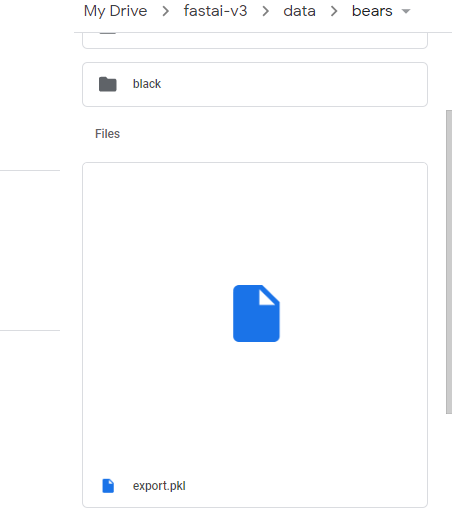

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

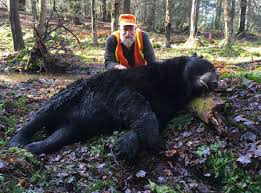

In [33]:
img = open_image(path/'black'/'00000021.jpg')
img

black 카테고리의 검은 곰이다. 이것을 잘 예측할지 보겠다.

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

내가 위에서 만들어준 내 드라이브에 있는 export.pkl을 가지고 learner를 만들었다.

In [35]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

black으로 잘 예측했다. 여기서 재미있는 생각이 떠올랐다. 아까 나는 이 ipynb를 google colab에서 실행했기 때문에 내 데이터셋에서 이상했던 애들을 제거할 수 없었고, 따라서 csv 파일을 활용해 새로운 ImageDataBunch를 만들 수 없었다. 그래서 export.pkl은 처음의 이미지들을 다 활용해서 만들어진 값을 가지고 있다. 그렇다면, 과연 처음에 내가 헷갈릴거 같다고 했던 black의 마지막 사진을 어떻게 예측하는지 보겠다. 내 모델이 어떤 결정을 내릴 지 궁금하다. (당연히 인간이라면 당연히 답을 못내린다. 저건 블랙이라고도, 그리즐리라고도 할 수 없다.)

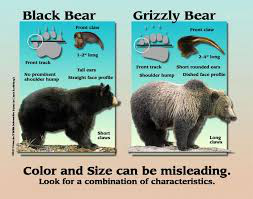

In [36]:
img = open_image(path/'black'/'00000199.jpg')
img

바로 이 문제의 사진이다. 일단 답은 블랙이다.

In [37]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category grizzly

;; 그리즐리로 예측해버렸다. 아마 주피터 노트북을 썼다면 이런 이미지들을 제거해서 새로운 DataBunch를 만들었을 것이다. 어쨌든 이런 말도 안되는 답을 가진 사진들이 있기 때문에 위에서 learning rate를 바꿔가면서까지 model을 수정해도 좋은 결과가 나오지 않았던 것이다.

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [39]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,20.332235,860571072.000000,0.658333,00:04


learning rate가 너무 높으면 이렇게 안좋은 model이 탄생한다. 한참 위에서 learning rate에 따른 loss의 그래프를 봤었는데, 그래프에는 learning rate 0.5의 loss가 나와있진 않지만 우리는 추세를 보아 0.5쯤되면 엄청나게 loss가 높을 것임을 안다.

### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [41]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.010739,2.189405,0.633333,00:05
1,2.003868,1.480328,0.608333,00:05
2,1.917506,1.337710,0.583333,00:05
3,1.914298,1.278533,0.558333,00:05
4,1.830198,1.274249,0.583333,00:05


이렇게 learning rate가 너무 낮아도 좋지 않다.

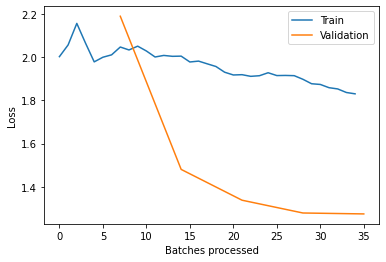

In [42]:
learn.recorder.plot_losses()

보면 train보다 validation의 loss가 더 낮다. 이말은, 내가 fitting을 충분히 하지 않았따는 뜻이다. 그 이유는 물론 learning rate가 너무 낮았기 때문이다.

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [44]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.465780,1.267068,0.550000,00:05


epoch가 너무 낮으면 충분히 train되지 않아서 안좋다. 사실 이부분은 exercise2에서 이미 공부한 부분이다. 반대로 epoch가 너무 높으면 시간만 오래걸리고 반복하더라도 수정시 좋은 효율을 보이지 않는다.

### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [46]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [47]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.424342,2.466383,0.662963,00:05
1,1.559622,2.265096,0.651852,00:03
2,1.585640,2.038943,0.635185,00:03
3,1.524089,1.792974,0.622222,00:03
4,1.430722,1.572183,0.592593,00:03
5,1.343577,1.327253,0.557407,00:03
6,1.260860,1.102260,0.481481,00:03
7,1.188507,0.905227,0.401852,00:03
8,1.080417,0.738565,0.322222,00:03
9,0.975667,0.608324,0.257407,00:03


보다시피, 갈수록 효율이 안좋아지고, 나중에는 에러율이 올라가기도 했다.